In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Loading Data

In [5]:
data = pd.read_csv('Ames_Housing_Data.csv')

# Preprocessing Data

In [7]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
data['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64


In [32]:
data['Lot Frontage'].mean()

69.22459016393442

In [33]:
data['Lot Frontage'].fillna(value=data['Lot Frontage'].mean(), inplace=True)

In [37]:
missing_values = data.isnull().sum()
print(missing_values)

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
LogSalePrice      0
Length: 82, dtype: int64


In [16]:
nanValues = data.isna()
print(nanValues)

        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  Alley  \
0     False        False      False         False     False   False   True   
1     False        False      False         False     False   False   True   
2     False        False      False         False     False   False   True   
3     False        False      False         False     False   False   True   
4     False        False      False         False     False   False   True   
...     ...          ...        ...           ...       ...     ...    ...   
2925  False        False      False         False     False   False   True   
2926  False        False      False          True     False   False   True   
2927  False        False      False         False     False   False   True   
2928  False        False      False         False     False   False   True   
2929  False        False      False         False     False   False   True   

      Lot Shape  Land Contour  Utilities  ...  Pool Area  Pool 

In [49]:
data.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,LogSalePrice
count,2.685000e+03,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2666.000000,2684.000000,...,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.00000,2685.000000,2685.000000
mean,7.238813e+08,58.249534,67.723234,9733.331099,5.879702,5.598510,1968.827933,1982.554190,79.137284,395.924367,...,43.784730,24.135940,2.512477,15.279330,2.102793,55.255493,6.184730,2007.80298,163394.932961,11.950990
std,1.885346e+08,43.508666,20.595798,6595.245723,1.232046,1.126036,29.914362,20.861989,149.405888,408.555443,...,65.801477,65.478399,24.865142,54.929797,35.242600,591.412441,2.696549,1.31946,51963.814363,0.333792
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000,34900.000000,10.460271
25%,5.323511e+08,20.000000,60.000000,7200.000000,5.000000,5.000000,1951.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.00000,127500.000000,11.755879
50%,9.021061e+08,50.000000,69.224590,9144.000000,6.000000,5.000000,1970.000000,1989.000000,0.000000,337.500000,...,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000,155000.000000,11.951187
75%,9.071961e+08,75.000000,75.000000,11080.000000,7.000000,6.000000,1998.000000,2002.000000,122.000000,672.000000,...,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000,195000.000000,12.180760
max,1.007100e+09,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.00000,296000.000000,12.598118


In [9]:
description = data.describe()
print(description)

                PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.930000e+03  2930.000000   2440.000000    2930.000000   2930.000000   
mean   7.144645e+08    57.387372     69.224590   10147.921843      6.094881   
std    1.887308e+08    42.638025     23.365335    7880.017759      1.411026   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7440.250000      5.000000   
50%    5.354536e+08    50.000000     68.000000    9436.500000      6.000000   
75%    9.071811e+08    70.000000     80.000000   11555.250000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111537    30.245361       20.860286

In [50]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,12.278398
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,11.561725
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,12.055256
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,12.404928
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,12.154258


In [10]:
variableTypes = data.dtypes
print(variableTypes)

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object


In [11]:
data.shape

(2930, 81)

# Data Formatting and Data Normalization

In [18]:
data['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [28]:
data['Alley'].fillna(-1, inplace=True)
data['Alley'].replace(to_replace=-1, value=0, inplace=True)
data['Alley'].replace(to_replace='Pave', value=1, inplace=True)
data['Alley'].replace(to_replace='Grvl', value=2, inplace=True)

In [30]:
data['Alley'].unique()

array([0, 1, 2], dtype=int64)

In [31]:
data['Alley'].dtype

dtype('int64')

In [33]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [37]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [38]:
data['Street'].dtype

dtype('O')

In [39]:
data['Street'].replace(to_replace='Pave', value=0, inplace=True)
data['Street'].replace(to_replace='Grvl', value=1, inplace=True)

In [40]:
data['Street'].unique()

array([0, 1], dtype=int64)

In [41]:
data['Street'].dtype

dtype('int64')

In [6]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Visualization

(array([ 146., 1333.,  908.,  329.,  134.,   51.,   14.,    9.,    4.,
           2.]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <BarContainer object of 10 artists>)

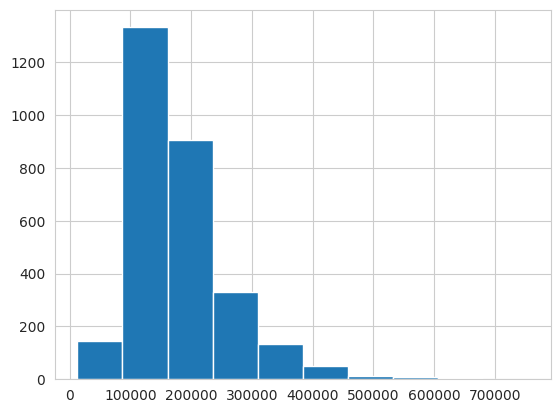

In [18]:
sns.set_style('whitegrid')
plt.hist(data['SalePrice'])

In [16]:
data['SalePrice'].mean()

180796.0600682594

# Data Normalised

In [21]:
min_value = data['SalePrice'].min()
max_value = data['SalePrice'].max()

print(min_value)
print(max_value)

12789
755000


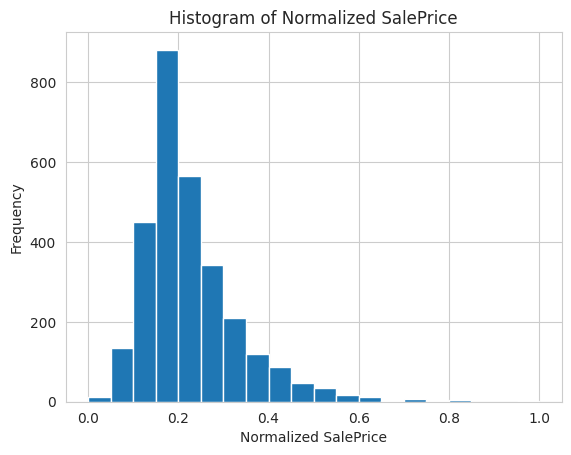

In [26]:
salePrice = data['SalePrice'].values.reshape(-1, 1)

scaler = MinMaxScaler()

normalizedData = scaler.fit_transform(salePrice)

sns.set_style('whitegrid')
plt.hist(normalizedData, bins=20)  
plt.xlabel('Normalized SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized SalePrice')
plt.show()

In [30]:
print("Min normalized value:", normalizedData.min())
print("Max normalized value:", normalizedData.max())

Min normalized value: 0.0
Max normalized value: 1.0


(array([ 11., 135., 451., 882., 565., 343., 210., 119.,  88.,  46.,  35.,
         16.,  11.,   3.,   6.,   3.,   4.,   0.,   0.,   2.]),
 array([ 12789.  ,  49899.55,  87010.1 , 124120.65, 161231.2 , 198341.75,
        235452.3 , 272562.85, 309673.4 , 346783.95, 383894.5 , 421005.05,
        458115.6 , 495226.15, 532336.7 , 569447.25, 606557.8 , 643668.35,
        680778.9 , 717889.45, 755000.  ]),
 <BarContainer object of 20 artists>)

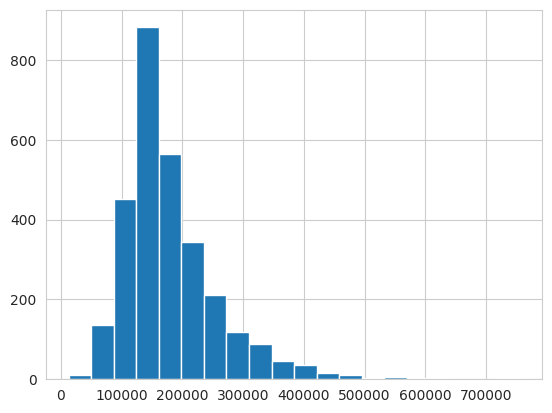

In [27]:
plt.hist(data['SalePrice'], bins=20)

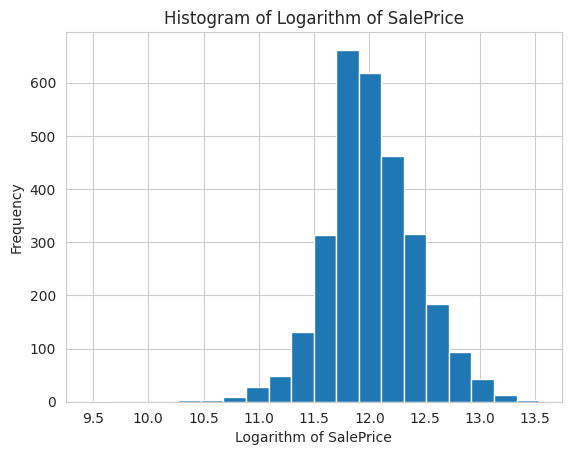

In [29]:
data['LogSalePrice'] = np.log1p(data['SalePrice'])


sns.set_style('whitegrid')
plt.hist(data['LogSalePrice'], bins=20) 
plt.xlabel('Logarithm of SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithm of SalePrice')
plt.show()

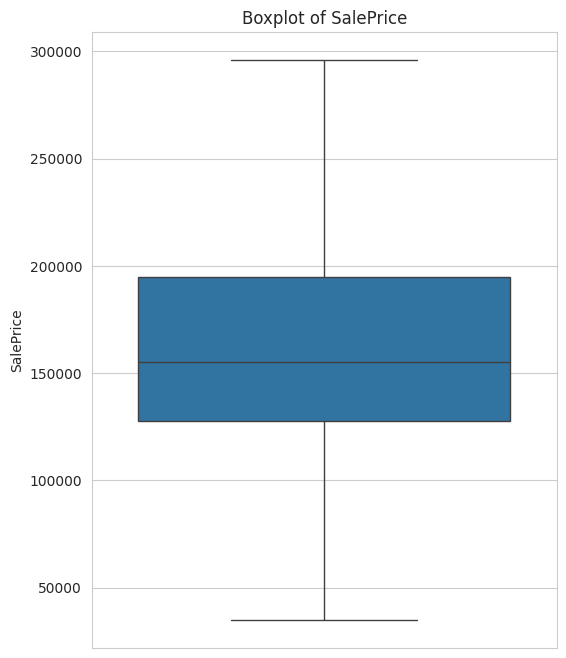

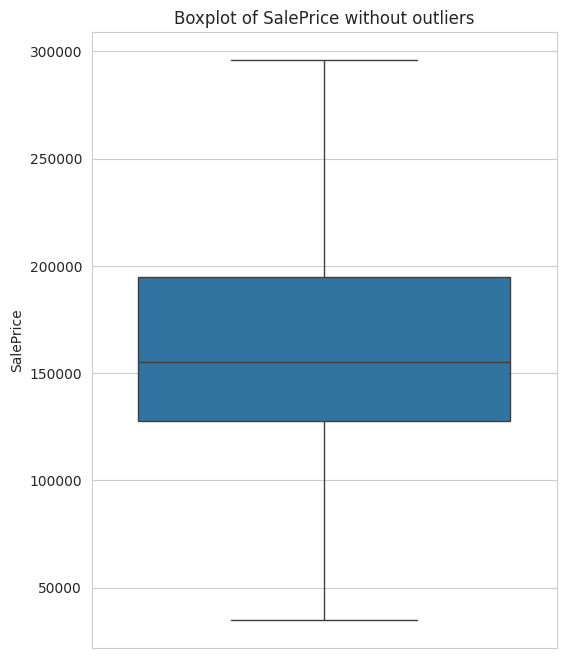

In [48]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice')
plt.show()

# Calculate IQR
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['SalePrice'] >= lower_limit) & (data['SalePrice'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice without outliers')
plt.show()